# Week 13 Discussion 11: PCA and KMeans


## Objectives


Principal Component Analysis (PCA) is a fundamental technique in data analysis and dimensionality reduction. It's used to identify patterns in data, **reduce its dimensionality while preserving its essential features**, and visualize high-dimensional datasets in a lower-dimensional space.

At its core, PCA seeks to transform the original variables of a dataset into a new set of orthogonal variables called **principal components**. These components are linear combinations of the original variables and are ordered by the amount of variance they explain in the data. The first principal component captures the direction of maximum variance, the second principal component captures the direction orthogonal to the first with the next highest variance, and so on.

PCA is particularly useful in various scenarios such as dimensionality reduction, data visualization, feature extraction, and noise filtering.

It is important to note that PCA is commonly used as a preprocessing approach, where further computations follow depending on the problem we are trying to solve. In some scenarios we are interested in clustering the data, where one of the first choices would be the KMeans algorithm.

K-means clustering is one of the most popular unsupervised machine learning algorithms used for partitioning a dataset into a predetermined number of clusters. It's widely employed in various fields such as data mining, image processing, pattern recognition, and market segmentation. The algorithm is relatively simple yet effective in identifying clusters based on similarity among data points.

This week, we will explore both the PCA and K-means algorithms. Our goals for PCA include:

1. Providing a concise overview of PCA's functionality.
2. Generating a dataset in which we understand the directions of variations and visualizing them.
3. Demonstrating PCA's performance on the synthetic data we generate, showcasing that its outcomes align with our expectations, given our prior knowledge of the data.

Regarding K-means, our agenda is similar:

1. Generating a dataset with visually distinct clusters that we anticipate K-means to identify.
2. Offering a brief explanation of K-means and implementing it.
3. Applying K-means to our synthesized data and verifying that the clusters identified match our expectations, given our prior knowledge of the data.


## Sources


This discussion on PCA and KMeans is based on the following references:
<br>
https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
<br>
https://www.youtube.com/watch?v=vtuH4VRq1AU&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=12


# Principal Components Analysis (PCA)

## PCA: 1. Review and Coding

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving the most important information. It achieves this by finding the directions, or principal components, along which the data varies the most. These principal components are orthogonal to each other and ordered by the amount of variance they explain in the data.

PCA normally is done in 5 steps:
1. Data Standardization
2. Covariance Matrix Calculation
3. Eigenvalue Decomposition
4. Selection of Principal Components
5. Projection

We will discuss them here one by one.

To be able to discuss code as well, let's create a small dataset. It will consist of 100 4-dimensional datapoints. Each row corresponds to a single datapoint:

In [1]:
import numpy as np

X = np.random.normal(size=(100, 4))

#### Data Standardization

Before performing PCA, it's common practice to standardize the data to have a mean of zero and a standard deviation of one. This ensures that all variables contribute equally to the analysis, regardless of their scales.

Let `X` be the original data matrix with `n` samples and `m` features. We calculate the standardized data matrix as follows:
$$
X_{\text{std}} = \frac{X - \mu}{\sigma},
$$
where $\mu$ is the mean vector of the original data and $\sigma$ is the standard deviation vector.

In code, this is done using:

In [2]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)

#### Covariance Matrix Calculation

The covariance matrix captures the relationships between different features in the data. It represents how much each pair of variables varies together.

The covariance matrix `C` is computed as:
$$
C = \frac{1}{n-1}(X_{\text{std}}^T X_{\text{std}}).
$$

In code, we can do this by:

In [3]:
n = X_std.shape[0]
C = 1 / (n - 1) * (X_std.T @ X_std)
print (C)

[[1.01010101 0.04519947 0.01343714 0.08175464]
 [0.04519947 1.01010101 0.15922858 0.06615609]
 [0.01343714 0.15922858 1.01010101 0.0475665 ]
 [0.08175464 0.06615609 0.0475665  1.01010101]]


#### Eigenvalue Decomposition

The next step is to find the eigenvectors and eigenvalues of the covariance matrix `C`. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues represent the amount of variance explained along each eigenvector.

Let `v` be an eigenvector of `C` and `λ` be the corresponding eigenvalue. The eigenvalue equation is:
$$
C\textbf{v} = \lambda \textbf{v}
$$

In code, we can get the eigenvectors and eigenvalues of the matrix `C` using the `numpy` library:

In [4]:
eig_vals, eig_vecs = np.linalg.eig(C)

The eigenvalue - eigenvector pairs can be inspected as follows:

In [5]:
for i, eig_val in enumerate(eig_vals):
    print (f'eigenvalue: {round(eig_val, 3)}')
    print ('eigenvector:')
    print (eig_vecs[:, i].round(3).reshape(-1, 1))
    print ('- - -')

eigenvalue: 1.227
eigenvector:
[[0.327]
 [0.617]
 [0.568]
 [0.435]]
- - -
eigenvalue: 1.041
eigenvector:
[[ 0.684]
 [-0.292]
 [-0.454]
 [ 0.491]]
- - -
eigenvalue: 0.925
eigenvector:
[[ 0.639]
 [ 0.141]
 [ 0.056]
 [-0.754]]
- - -
eigenvalue: 0.848
eigenvector:
[[ 0.13 ]
 [-0.717]
 [ 0.684]
 [ 0.027]]
- - -


#### Selection of Principal Components

Having obtained eigenvectors and eigenvalues, we sort eigenvectors in descending order based on their corresponding eigenvalues. The eigenvector with the highest eigenvalue represents the direction of maximum variance in the data and is called the first principal component. The subsequent eigenvectors represent directions of decreasing variance and are called the second, third, and so on, principal components.

We select the top `k` eigenvectors corresponding to the largest eigenvalues to form the matrix where `k` is the desired dimensionality of the lower-dimensional space.

Let's say we want to keep the best two. We can do this in code by first sorting the eigenvectors:

First getting the indexes of the sorted eigenvalues:

In [6]:
srtd_idx = eig_vals.argsort()[::-1]

Then sorting the eigenvalues based on the indexes:

In [7]:
eig_vals = eig_vals[srtd_idx]

Which we can check should be sorted now by:

In [8]:
print (eig_vals)

[1.22732817 1.04064524 0.92484631 0.84758433]


And then using the same indexes to move the eigenvectors around, so they correspond to the sorted eigenvalues:

In [9]:
eig_vecs = eig_vecs[:,srtd_idx]
print (eig_vecs)

[[ 0.32740252  0.6836878   0.63921333  0.12955655]
 [ 0.61700079 -0.29156304  0.14118557 -0.71719429]
 [ 0.56787324 -0.45411496  0.05617178  0.68421072]
 [ 0.43547399  0.49126529 -0.75386848  0.02651673]]


Now we can only keep the first two by:

In [10]:
Vk = eig_vecs[:, :2]
print (Vk)

[[ 0.32740252  0.6836878 ]
 [ 0.61700079 -0.29156304]
 [ 0.56787324 -0.45411496]
 [ 0.43547399  0.49126529]]


#### Projection

Finally, we project the standardized data onto the new feature subspace defined by the selected principal components:
$$
Y = X_{\text{std}} V_k
$$

In code, this will translate to simply doing:

In [11]:
proj = X_std @ Vk
print (proj[:15, :])

[[-1.54821687 -1.04172214]
 [-0.04220579 -1.84424796]
 [-1.20075527 -0.35519672]
 [ 1.06795418 -2.33940198]
 [-0.04374776 -0.98879692]
 [-1.8625796  -0.67099847]
 [ 0.45716287  0.66664336]
 [-0.3309845   0.83244373]
 [ 0.09164771  1.28596511]
 [-1.05071191  1.94955242]
 [ 1.43326074  0.74449254]
 [ 0.22136953 -0.63256881]
 [ 0.95120494 -0.73022008]
 [ 1.49525105 -1.19489066]
 [-0.88825761  0.31644395]]


By reducing the dimensionality of the data while preserving the most important information, PCA facilitates data visualization, exploration, and analysis. It is widely used in various fields such as image processing, pattern recognition, and machine learning

#### Putting Everything in a Python Class

Now you should recognize the following code:

In [12]:
class PCA:
    def __init__(self, k = 1):
        self.k = k

    def fit(self, X):
        # Saving mean and std for later
        # keepdims = True to ensure correct broadcasting
        self.X_mean = np.mean(X, axis=0, keepdims=True)
        self.X_std  = np.std (X, axis=0, keepdims=True)

        X_std = (X - self.X_mean) / self.X_std

        n = X_std.shape[0]
        C = 1 / (n - 1) * (X_std.T @ X_std)
        eig_vals, eig_vecs = np.linalg.eig(C)
        srtd_idx = eig_vals.argsort()[::-1]
        eig_vals = eig_vals[srtd_idx]
        eig_vecs = eig_vecs[:,srtd_idx]
        self.Vk  = eig_vecs[:, :self.k]

    def get_principal_components(self):
        return self.Vk

    def transform(self, X):
        # standardize the input based on saved mean and standard deviation
        X_std = (X - self.X_mean) / self.X_std

        # transform the data
        X_transformed = X_std @ self.Vk

        # revert standardization, return the result
        return (self.X_std * X_transformed) + self.X_mean

## PCA: 2. Dataset Generation

As previously mentioned, the aim of PCA is to identify the directions in which the data exhibits the highest variation. To test our PCA implementation, we can generate a dataset where we precisely know the directions along which the variability is highest and examine if PCA can accurately identify them.

For better visualization, we conduct this analysis on a two-dimensional dataset. We initiate this process by generating the dataset:

In [13]:
X = np.random.normal(size=(10000, 2))

Let's look at the first few rows:

In [14]:
print (X[:10, :])

[[ 0.87215808  0.66174451]
 [ 0.09462018 -0.0844616 ]
 [ 0.08813743  1.29027147]
 [ 0.76970439  0.65544441]
 [ 1.66066483  0.99424443]
 [ 0.30820349 -0.14605501]
 [-3.01097426  0.06398009]
 [-0.45010843  1.24929464]
 [ 0.84003255 -1.45465097]
 [-1.81653217 -1.56889207]]


We can also plot these datapoints using a simple plotting function:

In [15]:
import matplotlib.pyplot as plt

def plot(X):
    assert X.ndim == 2 and X.shape[1] == 2, "X should be 2-dimensional!"
    fig, ax  = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color = 'k')
    plt.show()

Now we can plot the data we created:

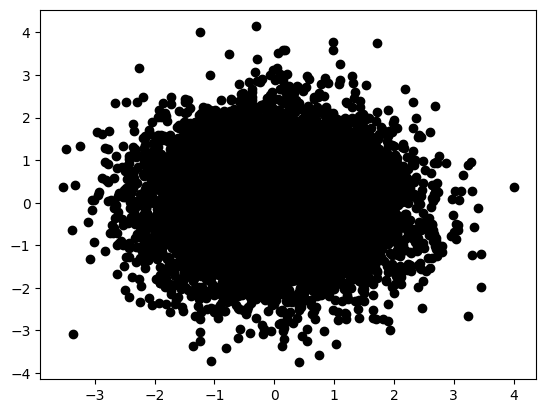

In [16]:
plot(X)

As can be seen, this data does not have a variation along a specific axis we can detect visually.

Turns out, we can use tools from linear algebra to transform it to such a data.

Let's assume we want the variations to be along the two vectors:
$$
\begin{bmatrix}
           1 \\
           1
         \end{bmatrix},
$$
and
$$
\begin{bmatrix}
           1 \\
           -1
         \end{bmatrix}.
$$
Moreover, we want most of the variation to be along the first vector.

To create a transformation that stretches the data along the given axes using different coefficients, we use tools from linear algebra which is out of the scope of this discussion. Therefore, we omit the details of why the transformation matrix `M` created below works:

In [17]:
m = np.array([[1, 1], [1, -1]]).T
m = m / np.linalg.norm(m, axis=0, keepdims = True)

M = m @ np.diag([4, 1]) @ m.T

By right multiplying the data matrix by `M`, we transform it:

In [18]:
X = X @ M

Now we can plot the data again:

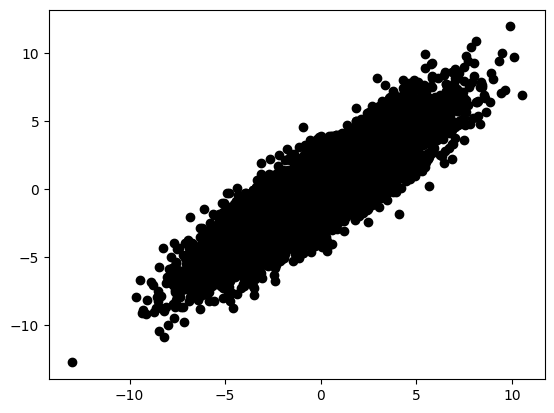

In [19]:
plot(X)

As can be seen, the first direction of variation is along the vector
$$
\begin{bmatrix}
           1 \\
           1
         \end{bmatrix},
$$
and the second along the vector
$$
\begin{bmatrix}
           1 \\
           -1
         \end{bmatrix}.
$$

Now we apply PCA to this data to see whether it finds the same axes of variation.

## PCA: 3. Applying PCA to Our Data

We have already done the heavy lifting of implementing the components we need. Applying PCA to our data is now simple:

In [20]:
pca = PCA(k=2) # k = 2 since we want to keep all dimensions
pca.fit(X)

Now we can inspect what eigenvectors the algorithm has found by printing `Vk`:

In [21]:
Vk = pca.get_principal_components()
print (Vk)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


We see that the first column, corresponding to the first principal component, is along the vector
$$
\begin{bmatrix}
           1 \\
           1
         \end{bmatrix},
$$
and the second column along the vector
$$
\begin{bmatrix}
           1 \\
           -1
         \end{bmatrix}!
$$

Interestingly, PCA has recovered the directions of maximum variation.

We can also transform the training data, which is equivalent to a change of variables, so each datapoint is written in terms of our newly found principal components:

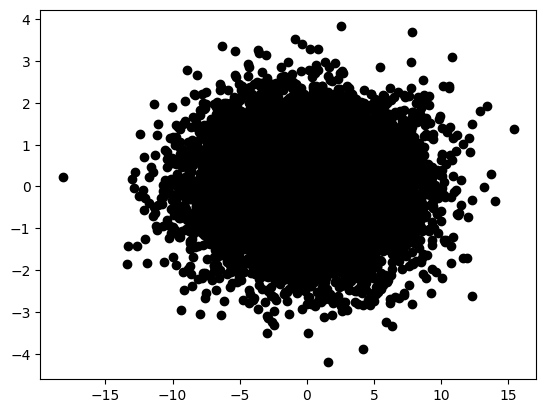

In [22]:
Y = pca.transform(X)
plot (Y)

As can be seen, it does not look like the original stretched data at all, and is now aligned with $x$ and $y$ axes.

# K-means

Let's shift our attention to clustering with K-means. K-means clustering stands out as a well-known unsupervised machine learning technique employed to divide a dataset into separate groups or clusters according to their resemblances. Its primary objective is to reduce the variance within clusters, striving for maximum homogeneity among them.

## K-means: 1. Dataset Generation

We initiate the process by generating a dataset that will serve as the foundation for our exploration of KMeans. This dataset comprises two-dimensional data points where the clustering structure is clearly discernible. Our objective is to leverage this dataset later to evaluate the ability of our KMeans algorithm to identify these clusters.

Let's create a dataset using the function `make_blob` from `make_blob`:

In [23]:
from sklearn.datasets import make_blobs

N = 1000 # number of datapoints
k = 5 # number of clusters
d = 2 # dimensionality of our datapoints

X, _ = make_blobs(n_samples=N, n_features=d, centers=k, random_state = 10)

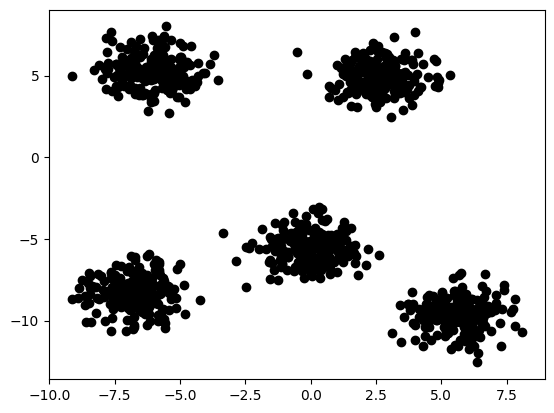

In [24]:
plot(X)

We see that there are 5 distinct clusters in the data.

## K-means: 2. Review And Coding

As said earlier, K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct clusters. The primary objective of K-means is to minimize the within-cluster variance, also known as inertia, by iteratively assigning data points to clusters and updating cluster centroids.

The K-means algorithm consists of two major steps which we discuss one by one:
1. Initialization: Start by randomly initializing K cluster centroids in the feature space.
2. In a loop, do the following:
    - Assignment Step: Assign each data point to the nearest cluster centroid based on a distance metric, often using the Euclidean distance. This step partitions the dataset into K clusters.
    - Update Step: After all data points have been assigned to clusters, compute the new centroids by taking the mean of the data points within each cluster. These centroids represent the new cluster centers.

Let's delve into how to fit a K-means algorithm to data.

First we initialize the centroids by sampling from the dataset itself. These sampled points serve as our first guesses of what the cluster centroids should be:

In [25]:
centroids = list(X[np.random.choice(X.shape[0], k, replace = False)])

Now comes what we need to eventually do in a loop: assignining points to clusters and updating centroids based on their point assignments. We start by assigning points to clusters by measuring how close they are to centroids.

First we define a measure of distance:

In [26]:
def _d(x, y): # Euclidean distance
    return np.linalg.norm(x - y)

Now we perform the cluster assignment. Looping over all the datapoints, for each datapoint, we find the closest centroid and add the index of the datapoint to the list corresponding to the closest centroid.

In [27]:
cluster_assignments = [[] for centroid in centroids]

for i in range(X.shape[0]):
    centroid = np.argmin([_d(X[i, :], centroid) for centroid in centroids])
    cluster_assignments[centroid].append(i)

We can inspect the list by looking at a few datapoints assigned to the first cluster:

In [28]:
cluster_assignments[0][:10]

[1, 6, 9, 12, 14, 16, 19, 25, 27, 38]

Consequently, the centroid for each cluster can be updated by performing an average over all datapoints assigned to that cluster:

In [29]:
for i in range(len(centroids)):
    centroids[i] = np.mean(X[cluster_assignments[i]], axis = 0)

We can inspect the new centroids:

In [30]:
centroids[0]

array([-5.48177293, -7.14004976])

The K-means algorithm involves performing the above steps in a for loop.
We can now put it all together to form a K-means class, you should recognize all parts now.

Note that we also add a plot function to the class so we can call every few iterations. The function structure is very similar to what we have seen before, therefore we omit the details.

In [31]:
class KMeans:
  def __init__(self, k, max_iter = 100):
    self.k        = k
    self.max_iter = max_iter

  def _init_centroids (self):
    return list(self.X[np.random.choice(self.X.shape[0], self.k, replace = False)])

  def _d(self, x, y): # Euclidean distance
    return np.linalg.norm(x - y)

  def _cluster_assgnmnt(self):
    cluster_assignments = [[] for centroid in self.centroids]

    for i in range(self.X.shape[0]):
      centroid = np.argmin([self._d(self.X[i, :], centroid) for centroid in self.centroids])
      cluster_assignments[centroid].append(i)
    return cluster_assignments

  def _update_centroids(self, cluster_assignments):
    for i in range(len(self.centroids)):
      self.centroids[i] = np.mean(self.X[cluster_assignments[i]], axis = 0)
    return self.centroids

  def fit(self, X):
    self.X = X

    self.centroids  = self._init_centroids()
    cluster_assignments = self._cluster_assgnmnt()
    self._plot(cluster_assignments)

    for i in range(self.max_iter):
      # assign clusters
      cluster_assignments = self._cluster_assgnmnt()

      # update centroids
      self.centroids = self._update_centroids(cluster_assignments)

      if i % 5 == 4:
        self._plot(cluster_assignments)

  def _plot(self, cluster_assignments):
    idx_to_c = [None] * self.X.shape[0]
    for c, idxs in enumerate(cluster_assignments):
      for i in idxs:
        idx_to_c[i] = c

    plt.figure()
    plt.scatter(self.X[:,0], self.X[:,1], c=idx_to_c)
    plt.show()

## K-means: 3. Applying K-means to our data

We can now apply the K-means we developed to our data:

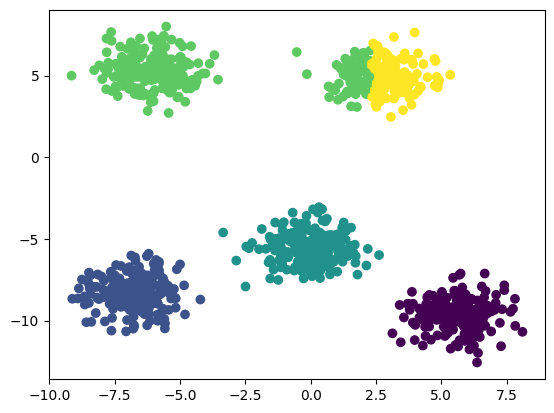

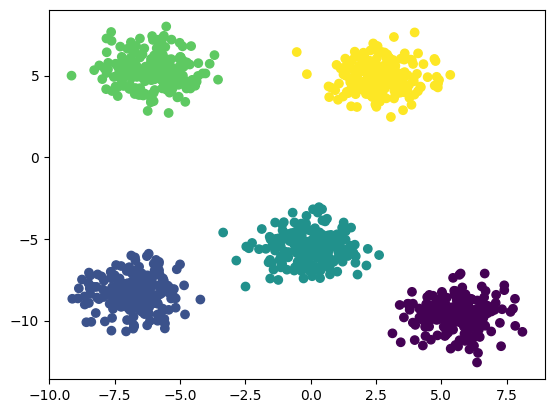

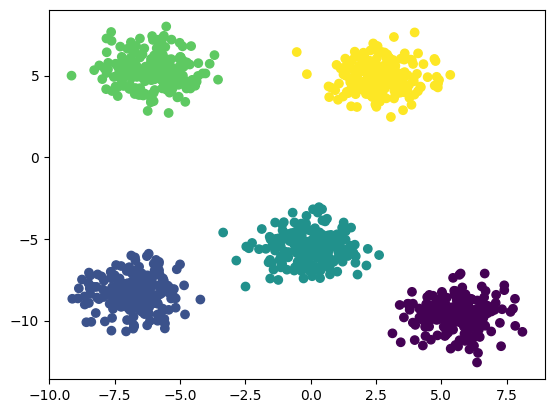

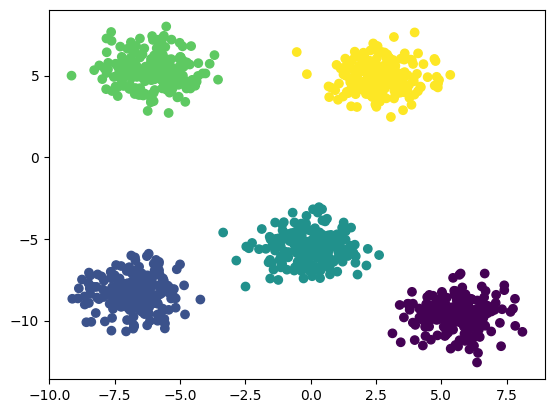

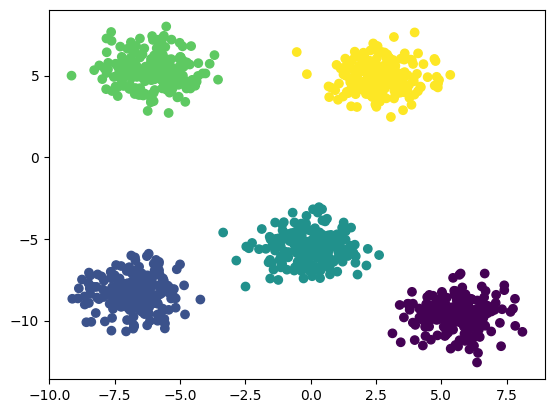

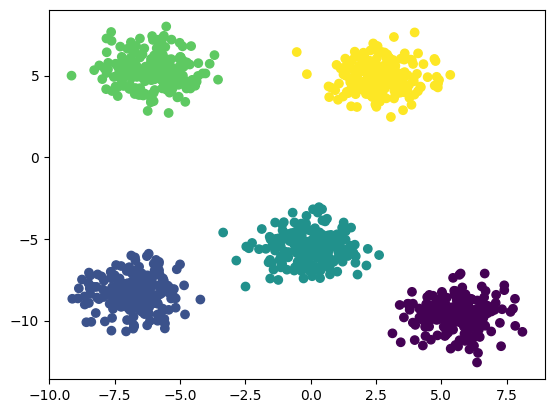

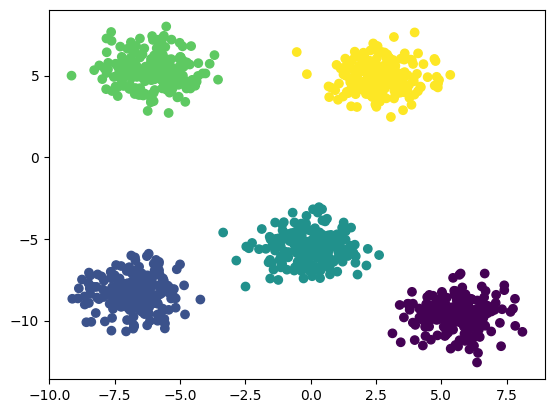

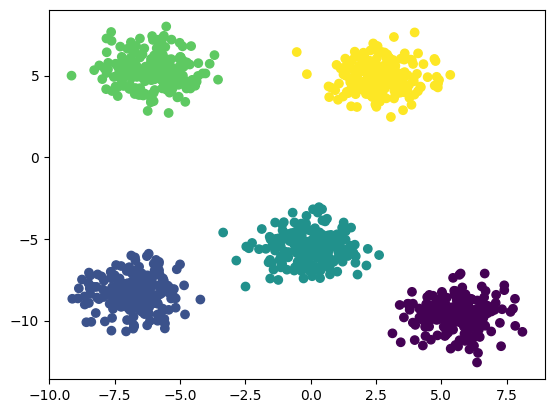

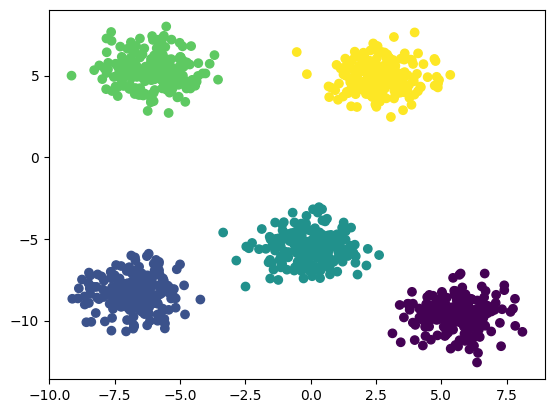

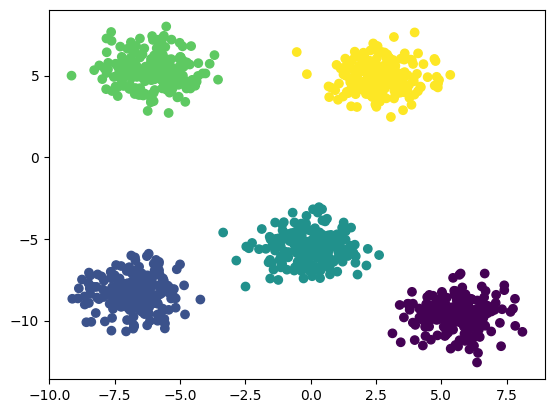

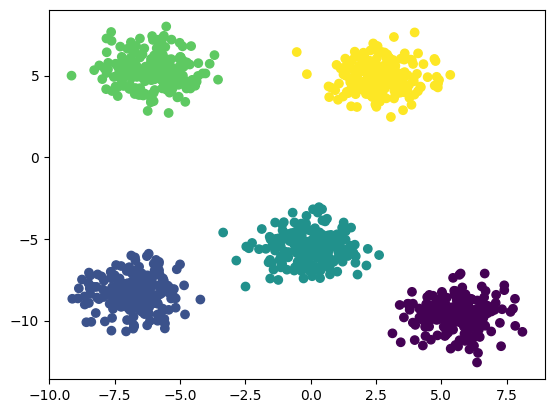

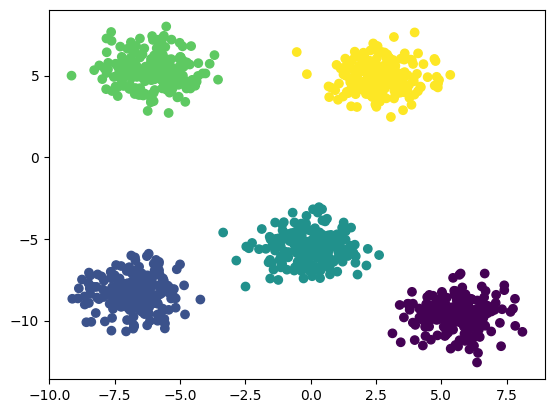

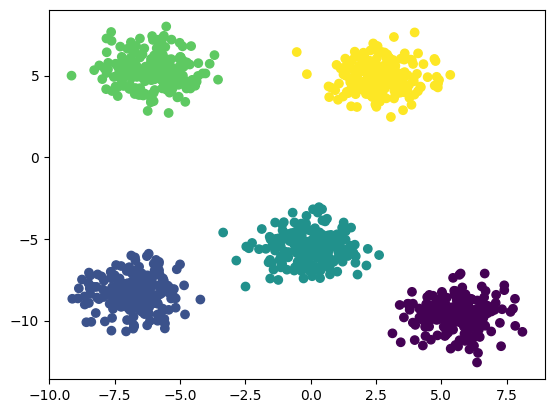

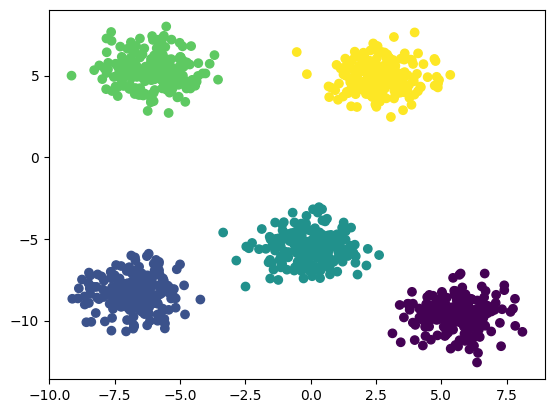

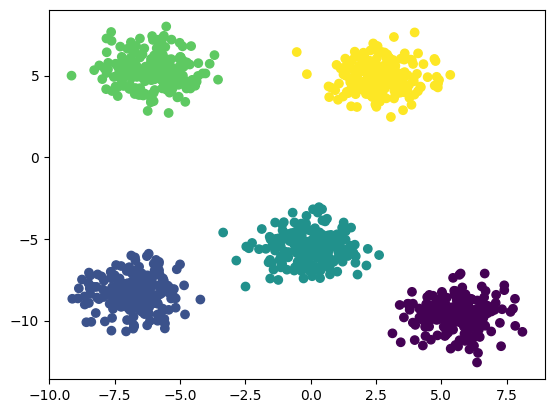

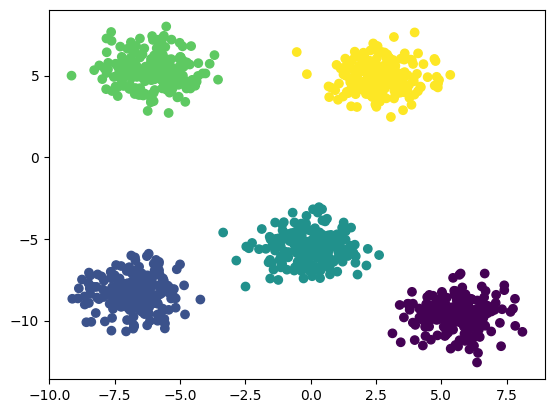

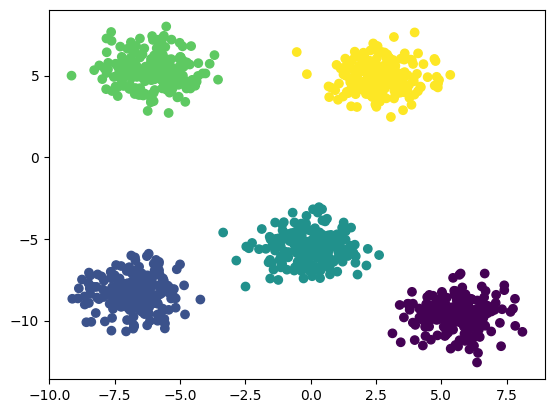

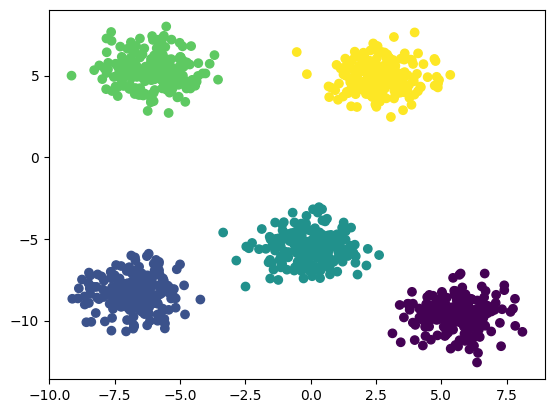

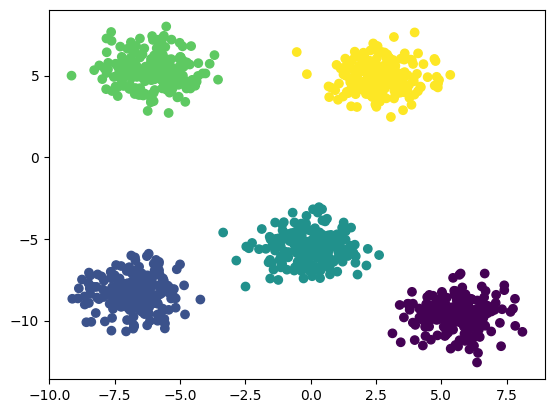

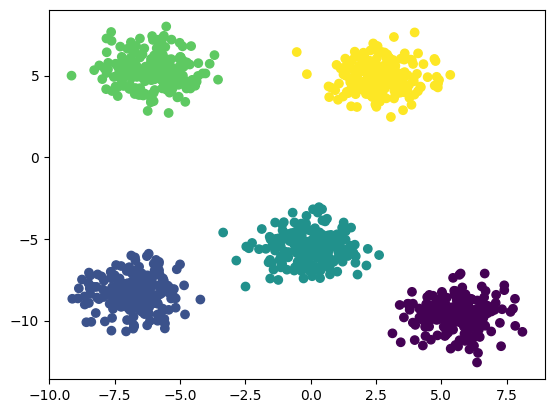

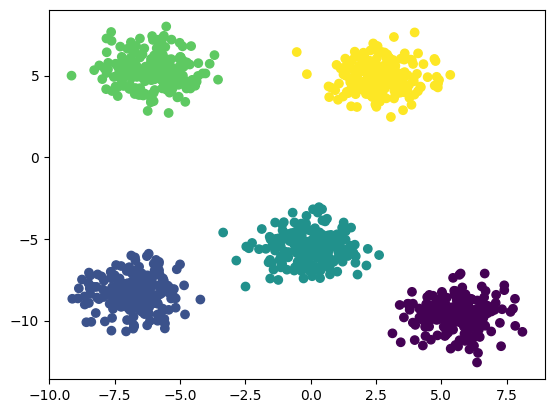

In [32]:
kmeans = KMeans(k=k, max_iter=100)
kmeans.fit(X)

## What We Have Learned

In this discussion, we accomplished the following regarding PCA:

1. Provided an PCA's functionality, and coded it up.
2. Generated a dataset in which we understand the directions of variations.
3. Demonstrated PCA's performance on the synthetic data we generate.

Regarding K-means, our agenda was similar:

1. Offered a brief explanation of K-means and implemented it.
2. Applied K-means to our synthesized data and verified that the identified clusters match our expectations.
3. Generated a dataset with visually distinct clusters.

Hope you have enjoyed this lesson!